> This assignment as two parts Section A and B. The first part is the implementation of function required in applying the CNN layers and the next section will be around the use of built in function of Tensorflow



`Before moving ahead as we have reached the stage of applying CNNs. We are going to deal with large number of parameters and hence more computational power. So you will need to connect runtime of collab to GPU: https://www.youtube.com/watch?v=-9CLfrZISRw`

### **BOTH THE SECTION CAN BE SOLVED INDEPENDENTLY** BUT SECTION A has **3X** more weightage than SECTION B doesn't have any code to write.

## **SECTION:A**

In [ ]:
import numpy as np

### Q1: Complete the following function corr2d(X, K), which implements the cross correlation operation for matrix X and kernel K, both are two dimensional numpy arrays (height x width). The function should return a 2 dimensional numpy array which is the result of cross correlation operation between X and K. 

- not giving channels right now : assume channels = 1

In [ ]:
def corr2d(X: np.array, K: np.array) -> np.array:
    # no padding for now and assume stride = 1

    h_X, w_X = X.shape
    if K.ndim == 2: h_K, w_K = K.shape 
    else: h_K, w_K = (1, K.shape[0])
    output_h = h_X - h_K + 1
    output_w = w_X- w_K + 1
    output = np.zeros((output_h, output_w))

    for i in range(output_h):
        for j in range(output_w):
            if K.ndim == 2:
                output[i, j] = np.sum(X[i:i+h_K, j:j+w_K] * K)
            else:
                output[i, j] = np.sum(X[i:i+h_K, j:j+w_K] * K.reshape(-1, 1))

    return output

In [ ]:
X = np.array([[0.0, 1.0, 2.0], [3.0, 4.0, 5.0], [6.0, 7.0, 8.0]], dtype=np.float32)
K = np.array([[0.0, 1.0], [2.0, 3.0]], dtype=np.float32)
print(corr2d(X, K)) # example done in class, try to print this and check if you get the right answer

[[19. 25.]
 [37. 43.]]


### now try to make a new function corr2d_multiple_input_channels(X, K) : where each X and K have the same number of channels, both of them are now 3 dimensional numpy arrays, the output should be a 2 dimensional numpy array (output_h, output_w).

- hint : Use the above corr2d function and read about np.stack

In [ ]:
def corr2d_multiple_input_channels(X: np.array, K: np.array) -> np.array: 
    # write a function for this task
    channels, h_X, w_X = X.shape
    
    if K.ndim==2 : _, h_K, w_K = K.shape[0], K.shape[1], 1
    else: _, h_K, w_K = K.shape

    output_h = h_X - h_K + 1
    output_w = w_X - w_K + 1

    output = np.zeros((output_h, output_w))

    for i in range(channels):
        output += corr2d(X[i], K[i])

    return output

In [ ]:
new_X = np.stack([X, X+1, X+2], axis=0) # stacking along a new dimension
new_K = np.stack([K, K+1, K+2], axis=0) 

print(f"new_X.shape = {new_X.shape}, new_K.shape = {new_K.shape}")
print(corr2d_multiple_input_channels(new_X, new_K))
# calculate the output by hand and then check whether you get the same answer
# answer should be a 2 dim np array : (output_height, output_width) 

new_X.shape = (3, 3, 3), new_K.shape = (3, 2, 2)
[[119. 149.]
 [209. 239.]]


### Write another function corr2d_mutli_in_out(X, K): where X (3 dim np array), K (4 dim numpy array), 0th dimension of K represents the number of kernel/filters we are using. Perform the cross correlation operation for K on X and return the output : 3 dim numpy array whose shape should be (num_output_channels, output_height, output_width)

- hint : use the above corr_2d_mutliple_input_channels(X, K) for each kernel in K and then stack them.

In [ ]:
def corr2d_multi_in_out(X: np.array, K: np.array) -> np.array:
    # X -> (num_in_channels, n_h, n_w)
    # K -> (num_out_channels, num_in_channels, k_h, k_w)
    # output -> (num_out_channels, o_h, o_w)
    
    num_in_channels, n_h, n_w = X.shape
    num_out_channels, num_in_channels, k_h, k_w = K.shape

    o_h = n_h - k_h + 1
    o_w = n_w - k_w + 1
    
    output = np.zeros((num_out_channels, o_h, o_w))

    for c in range(num_out_channels):
      output[c] += corr2d_multiple_input_channels(X, K[c])

    return output

In [ ]:
my_K = np.stack([new_K, new_K+1, new_K+2, new_K + 3], axis=0) 
print(f"my_K.shape = {my_K.shape}")

print(corr2d_multi_in_out(new_X, my_K)) # cross check the calculation

my_K.shape = (4, 3, 2, 2)
[[[119. 149.]
  [209. 239.]]

 [[155. 197.]
  [281. 323.]]

 [[191. 245.]
  [353. 407.]]

 [[227. 293.]
  [425. 491.]]]


### Q2: What is the computational and statistical benefits of stride larger than 1?? (not more than 20 word answer for each)

In [ ]:
"""
1. computationaL benefits :
    a) fewer operations executed and less memory allocated
    b) faster processsing as we are skipping intermediate positions
    c) reduced computational complexity

2. statistical benefits :
    As the stride length increases, the network becomes less sensitive to local 
    changes, i.e, small changes in input would be overlooked to a better degree.
    Hence, Better generalization (useful to avoid overfitting)
"""

'\n1. computationaL benefits :\n    a) fewer operations executed and less memory allocated\n    b) faster processsing as we are skipping intermediate positions\n    c) reduced computational complexity\n\n2. statistical benefits :\n    As the stride length increases, the network becomes less sensitive to local \n    changes, i.e, small changes in input would be overlooked to a better degree.\n    Hence, Better generalization (useful to avoid overfitting)\n'

### Q3: Now let's implement a model with just a single convolution layer, given X(input), Y(output) and K(kernel). Y is the output of the cross-correlation operation of K on X. You need to build a model to learn that kernel K.(try to print the kernel at each epoch)

- hint : conv_layer(output_channels = 1, input_channels = 1, kerenl_size=(1, 2), bias=False)

In [ ]:
X = np.ones((6, 8), dtype=np.float32)
X[:, 2:6] = 0
print(X)

[[1. 1. 0. 0. 0. 0. 1. 1.]
 [1. 1. 0. 0. 0. 0. 1. 1.]
 [1. 1. 0. 0. 0. 0. 1. 1.]
 [1. 1. 0. 0. 0. 0. 1. 1.]
 [1. 1. 0. 0. 0. 0. 1. 1.]
 [1. 1. 0. 0. 0. 0. 1. 1.]]


In [ ]:
K = np.array([1.0, -1.0], dtype=np.float32) # kernel, you need to learn this using a model
Y = corr2d(X, K) 
print(Y)

[[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]]


In [ ]:
X = X.reshape((1, 1, 6, 8)) # this will be the input to the model
Y = Y.reshape((1, 1, 6, 7)) # this is the output, to be used while calculation loss
lr = 3e-2 # use this learning rate

### Q4: Complete the following function max_pool2d(X, K) which performs maxpooling with kernel size K on X and returns and two dim numpy array

In [ ]:
def max_pool2d(X: np.array, K: tuple) -> np.array:
    # write a function for this job
    h_X, w_X = X.shape
    h_K, w_K = K

    output_h = h_X - h_K +1
    output_w = w_X - w_K +1

    output = np.zeros((output_h,output_w))

    for i in range(output_h):
      for j in range(output_w):
        pool_region = X[i : i+h_K, j : j+w_K]
        output[i, j] = np.max(pool_region)


    return output


In [ ]:
X = np.array([[0.0, 1.0, 2.0], [3.0, 4.0, 5.0], [6.0, 7.0, 8.0]], dtype=np.float32)
max_pool2d(X, (2, 2)) # check if the output matches with your calculation

array([[4., 5.],
       [7., 8.]])

# **SECTION:B**



### **JUST RUN THE CELLS AND VISUALIZE**( Nothing to code 🙂 )

> Indented block



In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
#importing the dataset
(X_train,Y_train),(X_test,Y_test) = tf.keras.datasets.cifar10.load_data()
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X_train,Y_train,test_size=0.3)

170498071/170498071 [==============================] - 6s 0us/step


In [ ]:
# Print shape of all 4 variables: X_train,Y_train,X_test, and Y_test
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(35000, 32, 32, 3)
(15000, 32, 32, 3)
(35000, 1)
(15000, 1)


/usr/local/lib/python3.10/dist-packages/matplotlib/text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


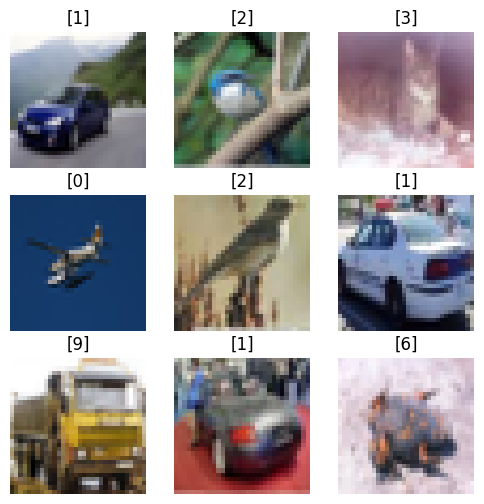

In [ ]:
#Lets visualize the CIFAR-10 dataset

import random
figure = plt.figure(figsize=(6,6))

for i in range(9):
  index = random.randint(0,len(X_train)-1) # showing the index_th image
  
  plt.subplot(3,3,i+1)
  plt.imshow(X_train[index])
  plt.title(Y_train[index])
  plt.axis(False)

In [ ]:
"""
So you can probably notice here that the images are 3D(coloured) but still 
not of great quality ( what can you expect from 32x32 image). Also there are
certain other factors which makes the classification a bit tougher than the 
cases of 2D( the digit and the fashion data) you dealt before. We will try to
understand the difficulties and find probable solution for them.
"""

'\nSo you can probably notice here that the images are 3D(coloured) but still \nnot of great quality ( what can you expect from 32x32 image). Also there are\ncertain other factors which makes the classification a bit tougher than the \ncases of 2D( the digit and the fashion data) you dealt before. We will try to\nunderstand the difficulties and find probable solution for them.\n'

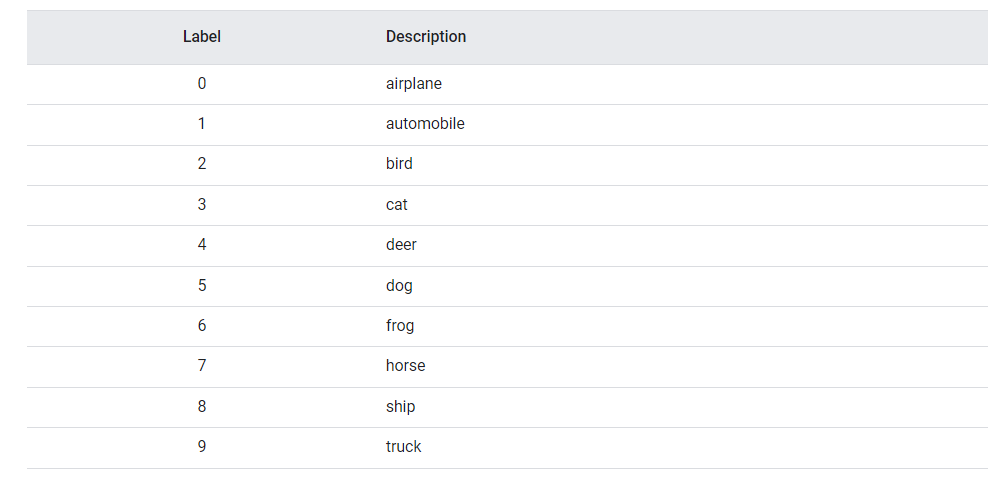

In [ ]:
"""
Lets first start with the CNN model discussed in the class for digit
 classification. Notice that I have changed the input shape for this usecase.
 Earlier it was (28,28,1) for the digit dataset.
"""

'\nLets first start with the CNN model discussed in the class for digit\n classification. Notice that I have changed the input shape for this usecase.\n Earlier it was (28,28,1) for the digit dataset.\n'

In [ ]:
# model initialization
cnn_model = tf.keras.Sequential()

# adding the 1st layer of CNN
cnn_model.add(tf.keras.layers.Conv2D(26, (5,5), activation = 'relu', input_shape=(32,32,3)))

# adding a maxpooling
cnn_model.add(tf.keras.layers.MaxPooling2D((2,2)))

#adding another CNN layer
cnn_model.add(tf.keras.layers.Conv2D(16, (5,5), activation = 'relu'))

# adding another maxpooling layer
cnn_model.add(tf.keras.layers.MaxPooling2D((2,2)))

#flattening the layer
cnn_model.add(tf.keras.layers.Flatten())

# 20 x 20 x 16
#dense layer
cnn_model.add(tf.keras.layers.Dense(64, activation='relu'))

# final layer 
cnn_model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [ ]:
cnn_model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                  loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])

In [ ]:
"""
Explain what is Adam optimizer below in atleast 250 words.[ read on web and explain ]

Answer: An optimization algorithm essentially acts as a catalyst and drives the deep learning model to learn at a better pace. Adam's optimizer is an extension to the stochastic
gradient descent and has great applications in the fields like computer vision (CV) and natural language processing (NLP). Adam is, typically, a combination of advantages of two 
other extensions of stochastic gradient descent. Namely, Root Mean Square Propagation (RMSP) and Adaptive Gradient algorithm (AdaGrad).

RMSP : This method adopts the learning rates based on the averages of magnitudes of the gradients of the weights.

AdaGrad : This method maintains learning rates that improves performance for the cases of sparse gradients.

Adam optimizer maintains adoptive learning rates based on the averages of the first moment (the mean) and the secocnd moment (the varaince). Mathematically, It calculates the
exponentially moving averages of gradients and squared gradients and it introduces β1 and β2 to keep a cap on the decay rates of these averages

ALGORITHM :

1. Intialization : It initializes both the moments to zero vectors with the shapes of model parameters.
2. Computes gradients : During training, gradients of the model parameters are computed using methods like back propogation.
3. Updating moments : mt = β1*mt + (1-β1)*(dL/dwt)     - updates first moment (the mean of gradients)
                      vt = β2*vt + (1-β2)*((dL/dwt)^2) - updates second moment (the variance of gradients)
4. Bias correction : as intially mt and vt are set to 0, they are biased towards 0. Hence, the corrected moments are:
                     mt' = mt/(1-β1^t) & vt' = vt/(1-β2^t)
5. Updating parameters : wt =  w(t-1) - A*(mt'/root(vt') + e) 

* so Adam runs the above in a loop and finally returns wt.

TERMINOLOGY :
t = time; wt = weights at time t; A = learning rate (Hyperparameter); L = Loss funtion; e = constant; Here the d is used to represent partial derivatives


Conclusion: Adam stands for "Adaptive Moment Estimation" and is found out perform all other optimizers. Adam optimizer gives a cutting edge and it can even handles cases of 
sparse gradients on noisy problems.

reference - https://optimization.cbe.cornell.edu/index.php?title=Adam#:~:text=Adam%20optimizer%20is%20the%20extended,processing%20in%20the%20future%20years.
            https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/
"""

"\nExplain what is Adam optimizer below in atleast 250 words.[ read on web and explain ]\n\nAnswer: An optimization algorithm essentially acts as a catalyst and drives the deep learning model to learn at a better pace. Adam's optimizer is an extension to the stochastic\ngradient descent and has great applications in the fields like computer vision (CV) and natural language processing (NLP). Adam is, typically, a combination of advantages of two \nother extensions of stochastic gradient descent. Namely, Root Mean Square Propagation (RMSP) and Adaptive Gradient algorithm (AdaGrad).\n\nRMSP : This method adopts the learning rates based on the averages of magnitudes of the gradients of the weights.\n\nAdaGrad : This method maintains learning rates that improves performance for the cases of sparse gradients.\n\nAdam optimizer maintains adoptive learning rates based on the averages of the first moment (the mean) and the secocnd moment (the varaince). Mathematically, It calculates the\nexpone

### **Make sure that you are connected to GPU runtime other wise the training in next cell is going to take a long time**

In [ ]:
history = cnn_model.fit(X_train, Y_train, epochs=10, validation_split=0.2)

Epoch 1/10
875/875 [==============================] - 6s 5ms/step - loss: 2.6537 - accuracy: 0.0999 - val_loss: 2.3030 - val_accuracy: 0.1001
Epoch 2/10
875/875 [==============================] - 4s 4ms/step - loss: 2.3026 - accuracy: 0.1011 - val_loss: 2.3025 - val_accuracy: 0.0979
Epoch 3/10
875/875 [==============================] - 4s 5ms/step - loss: 2.3026 - accuracy: 0.0998 - val_loss: 2.3026 - val_accuracy: 0.0999
Epoch 4/10
875/875 [==============================] - 4s 4ms/step - loss: 2.3019 - accuracy: 0.0990 - val_loss: 2.3035 - val_accuracy: 0.1019
Epoch 5/10
875/875 [==============================] - 4s 4ms/step - loss: 2.3020 - accuracy: 0.0992 - val_loss: 2.3030 - val_accuracy: 0.0987
Epoch 6/10
875/875 [==============================] - 4s 4ms/step - loss: 2.3016 - accuracy: 0.1014 - val_loss: 2.3042 - val_accuracy: 0.0979
Epoch 7/10
875/875 [==============================] - 4s 5ms/step - loss: 2.3012 - accuracy: 0.1000 - val_loss: 2.3029 - val_accuracy: 0.1001
Epoch 

In [ ]:
""" 
Write about validation accuracy in 100 words.

Answer: The validation accuracy is the measure of percentage of correctly predicted labels on the validation dataset during each epoch. It basically estimates how well the model
generalizes (and responds to) an unseen data. For any model, the increase in validation accuracy over the epochs means the model is bettering its response and adopting well. However
after a certain point, It may level off indicating that the model is more or less done learning. However, if the validation accuracy starts decreasing, it could indicate overfitting
, whereas, underfitting might be the case when accuracies remain low. Overfitting can be tackled by regularization techniques and for underfitting, we can try increasing the 
complexity by adding new layers, increasing polynomial degree in regression etc.
"""

' \nWrite about validation accuracy in 100 words.\n\nAnswer: The validation accuracy is the measure of percentage of correctly predicted labels on the validation dataset during each epoch. It basically estimates how well the model\ngeneralizes (& responds to) an unseen data. For any model, the increase in validation accuracy over the epochs means the model is bettering its response and adopting well. However\nafter certain point, It may level off indicating that the model is more or less done learning. However, if the validation accuracy starts decreasing, it could indicate overfitting\n, whereas, underfitting might be the case when accuracies remain low.\n'

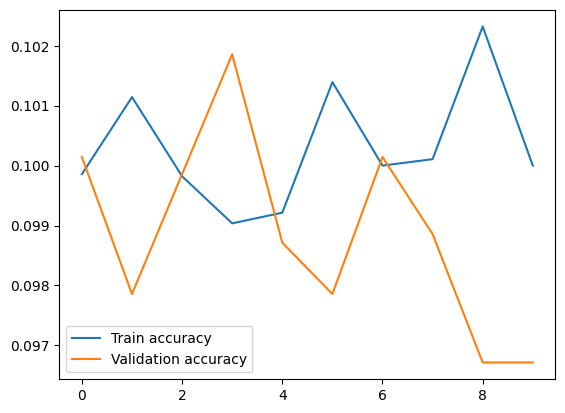

In [ ]:
plt.plot(history.history['accuracy'],label="Train accuracy")
plt.plot(history.history['val_accuracy'], label = "Validation accuracy")
plt.legend()

In [ ]:
"""
What do you think is happening? Is the model training or not? 

Ans: The values of accuracies seem to remain low, hence it might be the case of underfitting..

 You can see that both the training and validation accuracy are
 just roaming around 0.1. 
 One reason for this can be our model architecture. We had 26 filters
 in our first layer and 16 filters in our next layer. This funnel down approach
 works for dense layers but for Conv layers( which are good at feature extraction)
 we want them to extract more and more features.

 So lets change that to funne up --> 16 and 32 in the layers respectively
"""

In [ ]:
# model initialization
cnn_model = tf.keras.Sequential()

"""adding the 1st layer of CNN(Changed)"""
cnn_model.add(tf.keras.layers.Conv2D(16, (5,5), activation = 'relu', input_shape=(32,32,3)))

# adding a maxpooling
cnn_model.add(tf.keras.layers.MaxPooling2D((2,2)))

"""adding the 2nd layer of CNN(Changed)"""
cnn_model.add(tf.keras.layers.Conv2D(32, (5,5), activation = 'relu'))

# adding another maxpooling layer
cnn_model.add(tf.keras.layers.MaxPooling2D((2,2)))

#flattening the layer
cnn_model.add(tf.keras.layers.Flatten())

# 20 x 20 x 16
#dense layer
cnn_model.add(tf.keras.layers.Dense(64, activation='relu'))

# final layer 
cnn_model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [ ]:
cnn_model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                  loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])

In [ ]:
history = cnn_model.fit(X_train, Y_train, epochs=20, validation_split=0.2)

Epoch 1/20
875/875 [==============================] - 7s 6ms/step - loss: 2.6073 - accuracy: 0.2756 - val_loss: 1.7149 - val_accuracy: 0.3713
Epoch 2/20
875/875 [==============================] - 4s 4ms/step - loss: 1.6536 - accuracy: 0.3991 - val_loss: 1.5998 - val_accuracy: 0.4164
Epoch 3/20
875/875 [==============================] - 3s 4ms/step - loss: 1.5508 - accuracy: 0.4392 - val_loss: 1.5498 - val_accuracy: 0.4351
Epoch 4/20
875/875 [==============================] - 4s 4ms/step - loss: 1.4654 - accuracy: 0.4751 - val_loss: 1.4720 - val_accuracy: 0.4726
Epoch 5/20
875/875 [==============================] - 4s 4ms/step - loss: 1.3808 - accuracy: 0.5084 - val_loss: 1.5136 - val_accuracy: 0.4667
Epoch 6/20
875/875 [==============================] - 4s 4ms/step - loss: 1.3292 - accuracy: 0.5281 - val_loss: 1.4601 - val_accuracy: 0.4919
Epoch 7/20
875/875 [==============================] - 3s 4ms/step - loss: 1.2736 - accuracy: 0.5548 - val_loss: 1.3864 - val_accuracy: 0.5137
Epoch 

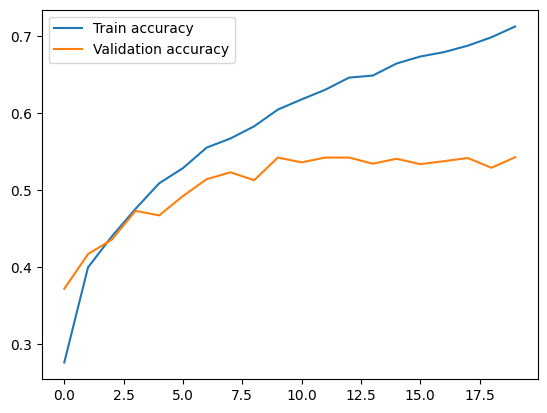

In [ ]:
plt.plot(history.history['accuracy'],label="Train accuracy")
plt.plot(history.history['val_accuracy'], label = "Validation accuracy")
plt.legend()

In [ ]:
"""
Did our model improved?? 
Are we done with the job? 
What is happening after 5( roughly ) epochs? Why is there a gap between
training and validation accuracy?

Our training accuracy reached to 0.73( and still increasing ) but 
the validation accuracy seems to stagnate at 0.52.

Is our model overfitting on the training data so much that it can't work well 
on unseen data.
"""

In [ ]:
"""
How are we gonna tackel this problem?
Well, we will see that in next part of this assignment.
Till then lets learn about about overfitting.
"""

> **Well using Chatgpt to answer these question is something which everyone can think of right?? To create a difference write answer in your own terms after reading from web or reading the answer of Chatgpt.**
### **After all this is your midterm evaluation. Cheating is something we can catch easily** ( we have also done this )

# please take note of this change: 
**[For all the subjective questions after this question( in the ss ) you need put the link of articles that you referred while searching about the question.]**\
Ideally you should refer to at least 2 articles for each of those questions.\
Also you do not need to go into deep maths of those( a qualitative answer is what we will be looking for)

In [ ]:
"""
[CLARIFICATION]: Reading and understanding by searching on Chatgpt is not 
considered as cheating as long as you are writing that in your own word
( only problem is the crediblity of its information)

"""

In [ ]:
"""
Question: What is overfitting and underfitting below ( atleast 200 words )

Answer: Overfitting and underfitting are typically, two possible malfittings happening when the model is not able to generalize the unseen data properly.

When a model trains for too long or it becomes overly complicated, It starts to memorize the training data rather than learning the patterns. This phenomenon occurs when 
the model learns the "noise" or random fluctuations in the training data. Consequently, the model memorizes the noise and fits too closely to the training set and, hence, it 
doesn't generalize the unseen data. This phenomenon is termed as OVERFITTING.Low error rates and high variance are generally indicators of overfitting.

Underfitting is just he contrary, It occurs when the model is not trained for long enough or if the model is too simple that it isn't able to grasp the patterns. Unlike 
overfitting, underfitting shows high bias and less variance among their predictions.

To better understand these, we can take the analogy of a student preping for his exam. If he doesn't cover up the whole syllabus, he probably cant perform well in the exam. On the other
hand, if he completes everything and focuses more on the exceptions than the concept, then he might mess up in the exam by complicating simple quesions. Here the student is the model, questions are
the validation datas. The first case represents underfitting whereas the second represents overfitting.

reference - https://www.ibm.com/topics/overfitting
            https://www.ibm.com/topics/underfitting
"""

In [ ]:
"""
Question: What are regularization techniques in machine learning?(200 words)

Answer: As the name suggests, It refers to the techniques used in order to avoid (/regularize) overfitting. It basically adds a penalty term to the loss function during the 
training process, preventing the model from becoming too complex and, henceforth, controlling the model's ability to fit the noise. Few of the techniques are:

1. L1 & L2 Regularization : Cost function = Loss + Reglarization term
let x is the regularization parameter
    for L1: Cost function = Loss + (x/2m)*||w||
    for L2: Cost function = Loss + (x/2m)*(||w||^2)
Due this additional factor, the values of weight matrices decrease and hence the model becomes simpler.

2. Elastic net Regularization : It is the combination of L1 and L2. It overcomes some limitations of L1 and L2 regularizations and bring a balance.

3. Dropout : This is specifically used in neural networks. So basically we keep dropping a fraction of neurons at every update which prevents the network from relying heavily 
on a specific set of neurons.

4. Early stopping : as simple as it looks, we stop the training process before it overfits. We keep track of the performance on the validation set and stop the model when its
accuracy seems to decrease.

5. Data Augmentation : here rather than cutting the data short or stopping the model we will extend the training dataset using artificial methods.

Every method in this follows a different approach but the end result is essentially to prevent the model from becomiong overly complicated.

reference - https://www.analyticsvidhya.com/blog/2018/04/fundamentals-deep-learning-regularization-techniques/
            ChatGPT.
"""

In [ ]:
"""
Question: What dropout layer and what does it do?( read it from Tensorflow.org and write in 200 words)

Answer: As said earlier dropout means to typicalling, droping out few neurons at each layer to prevent overfitting. In TensorFlow, the dropout layer is implemented using 
"tf.keras.layers.Dropout()" Class. The dropout layer randomly sets a fraction of input units to 0. The fraction of units to be dropped depends on the dropout rate. The inputs
which aren't set to 0 are scaled up by a factor of 1/(1-rate) there is a good reason for doing this.  During inference or prediction, when the dropout layer is not active, all 
units are present. After we dropout few units the scaling up accounts for the fact that more units are active during inference compared to training, ensuring that the expected
outputs of the dropout layer remain the same.

As for the code, 

the arguments we can give to this class are: The tensor inputs; the dropout rate; noise_shape; seed; Python boolean / TensorFlow boolean scalar tensor; name of the layer

the class returns the output tensor

example: 

model = tf.keras.Sequential()
    .
    .
    .
    tf.keras.layers.Dense(64, activation='relu') # adds an intermediate dense layer
    tf.keras.layers.Dropout(0.5) # drops out half of the units in it. (rate = 0.5)
    .
    .
    .

reference - https://www.tensorflow.org/api_docs/python/tf/compat/v1/layers/dropout
            ChatGPT
"""

In [ ]:
"""
Question: What is L1 normalization? write its formulae as well( atleast 200 words )

Answer: Normalisation, here, basically means to bring down the total value to one. To better understand, we can compare this with vector normalization, in which the vector is divided with its magnitude 
to bring down its value to one and make it a unit vector. L1 Normalization typically is a method adopted to convert the dataset in such a way that in each row of the matrices the sum of the absolute 
values will add up to one.

firstly lets go through its implementation : 

eg:-  Data = read_csv(...)
      array = data.values
      Data_normalizer = Normalizer(norm='l1').fit(array)
      Data_normalized = Data_normalizer.transform(array)
      
now lets understand its mechanism : let a row of the matric be x = [x1 x2 ... xn]
in L1 normalization, the normalization term is calculated by taking the sum of the absolute values. The formula for L1 normalization is as follows:

L1_norm =  ∑|xi|; then we will divide all xi's with L1_norm which gives - x' =[x1/L1_norm x2/L1_norm ... xn/L1_norm]
Here we can observe that |x1/L1_norm| + |x2/L1_norm| + ... + |xn/L1_norm| =1 from the way we defined L1_norm

whereas for vectors it is 

L1_normalized = vector/||vector||

Essence :
 
 L1 normalization is commonly used in the fields like natural language processing (NLP). It ensures that different features and variables are on comparable scale, by doing so the relative importance
 or contribution of each individual entity could be understood better.

 reference - https://www.tutorialspoint.com/machine_learning_with_python/machine_learning_with_python_lone_normalization.htmes.
             https://stats.stackexchange.com/questions/502387/what-is-the-l1-normalization-of-some-data
             https://www.youtube.com/watch?v=cC7gHpO7PV0
             ChatGPT

"""

"\nQuestion: What is L1 normalization? write its formulae as well( atleast 200 words )\n\nAnswer: Normalisation, here, basically means to bring down the total value to one. To better understand, we can compare this with vector normalization, in which the vector is divided with its magnitude \nto bring down its value to one and make it a unit vector. L1 Normalization typically is a method adopted to convert the dataset in such a way that in each row of the matrices the sum of the absolute \nvalues will add up to one.\n\nfirstly lets go through its implementation : \n\neg:-  Data = read_csv(...)\n      array = data.values\n      Data_normalizer = Normalizer(norm='l1').fit(array)\n      Data_normalized = Data_normalizer.transform(array)\n      \nnow lets understand its mechanism : let a row of the matric be x = [x1 x2 ... xn]\nin L1 normalization, the normalization term is calculated by taking the sum of the absolute values. The formula for L1 normalization is as follows:\n\nL1_norm =  ∑|

In [ ]:
"""
Question: What is L2 normalization? write its formulae as well( atleast 200 words )

Answer: Similar to L1 normalization, L2 normalization is another method employed to normalize the values but here wd convert the dataset in such a way that the sum of the square of these values will 
equate to zero this time. Even here we will introduce a factor named L2_norm so that when all the values are divided with this factor the values thus obtained will be normalized.

First, let us see the logic or mechanism behind the code :

Here L2_norm is the square root of the sum of the squares of the values.
L2_norm = sq.root(∑(xi^2)); now we will have to divide all xi's with L2_norm. that will give us - x' =[x1/L2_norm x2/L2_norm ... xn/L2_norm]
this time from the very definition of L2_norm we can understand that (x1/L2_norm)^2 + (x2/L2_norm)^2 + ... + (xn/L2_norm)^2 =1

whereas for vectors it is

L2_normalized =  vector/||vector||2

Now lets see its implementation: similar to L1 normalisation

eg:-  Data = read_csv(...)
      array = data.values
      Data_normalizer = Normalizer(norm='l2').fit(array)
      Data_normalized = Data_normalizer.transform(array)

Essence :

    L2 normalization is also used in various fields like machine learning and signal processing. Here by normalizing in this method, the relative magnitude and direction of each vector could be compared
    and understood better. From what I have found on net, I believe that L1 & L2 normalization are different from L1 & L2 regularization
    
reference - https://www.tutorialspoint.com/machine_learning_with_python/machine_learning_with_python_ltwo_normalization.htm#:~:text=It%20may%20be%20defined%20as,is%20also%20called%20least%20squares.
            https://www.youtube.com/watch?v=cC7gHpO7PV0
            ChatGPT

"""

In [ ]:
"""
Question: What is data augmentation techniques and why is it needed in machine learning?( atleast 200 words )

Answer: Data augmentation is a process of artificially increasing the training data set by creating the augmented versions (artificial versions) of the existing dataset. For doing 
so, we use random yet realistic transformations like image rotations, translations, scaling, flips, noise addition etc. Synthetic data is also created artificially but without 
using original dataset, rather DNNs and GANs are used often for this data.

FEW REASONS FOR DATA AUGMENTATION :

1. prevents overfitting : By providing a more diverse training set, it enables the model to learn the patterns with less complexity and hence betters its generalization.

2. increase dataset size : sometimes, it might be difficult or expensive or time taking to collect large amount of labelled data. Data augmentation helps us tackle such
practical constrains by artificially expanding thr dataset, might not be as accurate though.

3. imbalanced dataset : when the data set contains significantly smaller number of samples of certain class the model might not learn to generalize well for this class.
Again, in this case we can extend the sample set for this particular class using data augmentation.

4. improves generalization : as we are supplimenting it with augmented data as well, it learns better and generalizes well.

FEW LIMITATIONS FOR DATA AUGMENTION :

1. biases in the original data set would be carried on as augmented datasets are primarily derived from the original ones.

2. not all augmentation methods are effective for every type of data. Hence methods have to be chosen selectively. If not, It might lead to learning of unrealistic patterns as well.

reference - https://www.datacamp.com/tutorial/complete-guide-data-augmentation
            https://www.tensorflow.org/tutorials/images/data_augmentation
            ChatGPT


"""

####**Did you take note of the change in the cell at the start of these subjective questions ?**

In [ ]:
"ANS(Yes/No): YES "